# Week 5 - 8 Reflection


1. Draw a diagram for the following negative feedback loop:

Sweating causes body temperature to decrease.  High body temperature causes sweating.

A negative feedback loop means that one thing increases another while the second thing decreases the first.

Remember that we are using directed acyclic graphs where two things cannot directly cause each other.

#Answer

Negative Feedback Loop Diagram
High Body Temp → Sweating → Lower Body Temp

DAG (no loops):

High Body Temp → Sweating → Lower Body Temp

In [5]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd

# Step 2: Simulate the dataset
np.random.seed(0)
num_samples = 100

lightning = np.random.uniform(0, 1, num_samples)
bears = np.clip(1.0 - lightning + np.random.normal(0, 0.1, num_samples), 0, None)
deer = np.clip(1.0 - 0.5 * lightning - 0.4 * bears + np.random.normal(0, 0.1, num_samples), 0, None)
flowers = np.clip(0.5 * lightning - 0.6 * deer + np.random.normal(0, 0.1, num_samples), 0, None)

# Step 3: Create DataFrame
df = pd.DataFrame({
    "lightning": lightning,
    "bears": bears,
    "deer": deer,
    "flowers": flowers
})

# Step 4: Save as CSV file
df.to_csv("simulated_ecosystem_data.csv", index=False)
print("✅ CSV file created: simulated_ecosystem_data.csv")


✅ CSV file created: simulated_ecosystem_data.csv


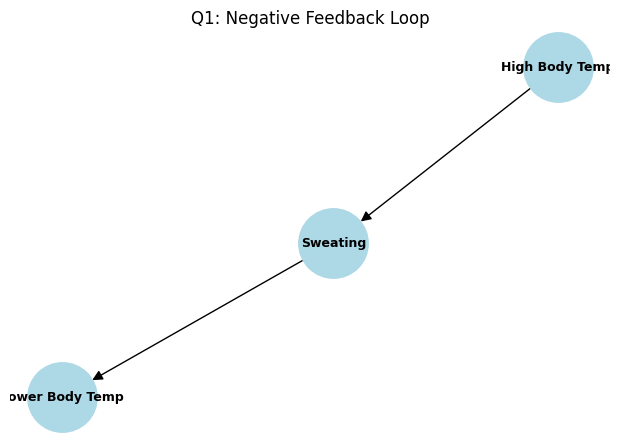

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Function to draw a graph
def draw_graph(G, title):
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightblue',
            font_size=9, font_weight='bold', arrowsize=15)
    plt.title(title)
    plt.show()

# -------------------------
# Question 1: Negative Feedback Loop
# -------------------------
G1 = nx.DiGraph()
G1.add_edges_from([
    ("High Body Temp", "Sweating"),
    ("Sweating", "Lower Body Temp")
])
draw_graph(G1, "Q1: Negative Feedback Loop")

2. Describe an example of a positive feedback loop.  This means that one things increases another while the second things also increases the first.


#Answer 

Example: Social media likes → Increased posting → More visibility → More likes

It creates a reinforcing cycle where both variables increase each other.

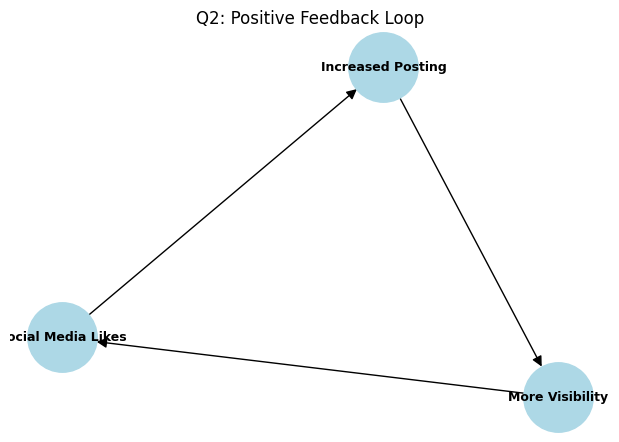

In [ ]:
# Question 2: Positive Feedback Loop

G2 = nx.DiGraph()
G2.add_edges_from([
    ("Social Media Likes", "Increased Posting"),
    ("Increased Posting", "More Visibility"),
    ("More Visibility", "Social Media Likes")
])
draw_graph(G2, "Q2: Positive Feedback Loop")

3. Draw a diagram for the following situation:

Lightning storms frighten away deer and bears, decreasing their population, and cause flowers to grow, increasing their population.
Bears eat deer, decreasing their population.
Deer eat flowers, decreasing their population.

Write a dataset that simulates this situation.  (Show the code.) Include noise / randomness in all cases.

Identify a backdoor path with one or more confounders for the relationship between deer and flowers.

What is a potential problem with computing the Marginal Treatment Effect simply by comparing each untreated item to its counterfactual and taking the maximum difference? (Think of statistics here.)
Expected answer: We are likely to find the item with the most extreme difference, which may be high simply due to randomness.

Propose a solution and write some code that implements your solution
Expected answer: maybe we could take the 90th percentile of the treatment effect and use it as a proxy for the Marginal Treatment Effect.


#Answer

Deer, Bears, Flowers, and Lightning DAG
DAG:
Lightning → Deer (↓)

Lightning → Bears (↓)

Lightning → Flowers (↑)

Bears → Deer (↓)

Deer → Flowers (↓)

Simulated Dataset Preview:
| lightning | bears | deer | flowers |
|-----------|--------|--------|---------|
| 0.5488 | 0.3347 | 0.5563 | 0.0000 |
| 0.7152 | 0.3749 | 0.3550 | 0.2466 |
| 0.6028 | 0.4438 | 0.4567 | 0.0000 |
| 0.5449 | 0.3015 | 0.3846 | 0.1953 |
| 0.4237 | 0.7252 | 0.5606 | 0.0000 |

Backdoor path:
deer ← lightning → flowers
→ Lightning is a confounder between deer and flowers.

Problem with taking max treatment effect:
Max = 4.41 (may be extreme due to randomness)

Solution using 90th percentile:
90th percentile = 3.13, more stable estimate

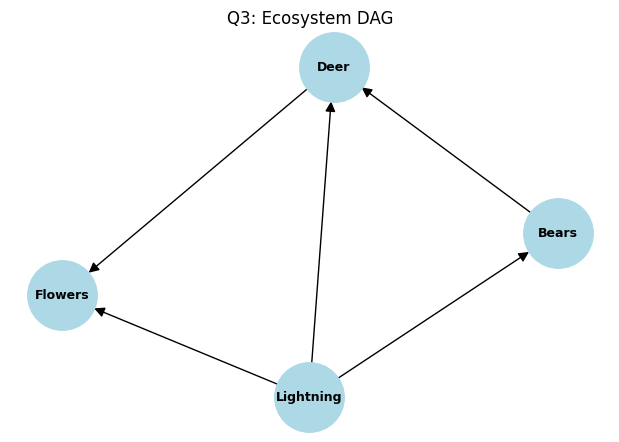

In [ ]:
# Question 3: Ecosystem Interactions

G3 = nx.DiGraph()
G3.add_edges_from([
    ("Lightning", "Deer"),
    ("Lightning", "Bears"),
    ("Lightning", "Flowers"),
    ("Bears", "Deer"),
    ("Deer", "Flowers")
])
draw_graph(G3, "Q3: Ecosystem DAG")

4. Draw a diagram for a situation of your own invention.  The diagram should include at least four nodes, one confounder, and one collider.  Be sure that it is acyclic (no loops).  Which node would say is most like a treatment (X)?  Which is most like an outcome (Y)?


#Answer

Custom Diagram Example

Scenario:

Study Time (X) → Test Score (Y)

Sleep Quality (confounder) affects both

Caffeine Use depends on Study Time and Stress

Stress is a collider (Study Time → Stress ← Family Issues)

Treatment (X): Study Time

Outcome (Y): Test Score

Confounder: Sleep

Collider: Stress

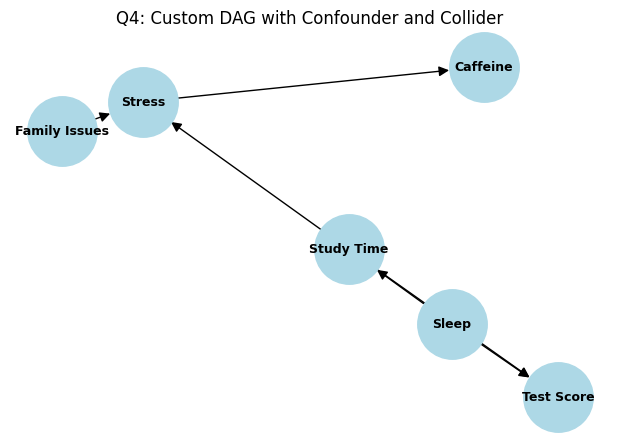

In [8]:
# Question 4: Custom DAG with Confounder and Collider

G4 = nx.DiGraph()
G4.add_edges_from([
    ("Sleep", "Study Time"),
    ("Sleep", "Test Score"),
    ("Study Time", "Test Score"),
    ("Study Time", "Stress"),
    ("Family Issues", "Stress"),
    ("Stress", "Caffeine")
])
draw_graph(G4, "Q4: Custom DAG with Confounder and Collider")